<a href="https://colab.research.google.com/github/GorkemKir/Eigenfaces/blob/master/Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Update Sklearn to 0.22.1
!pip3 install -U scikit-learn
import sklearn
print(sklearn.__version__)

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.1)
0.22.1


# Face Detection With Eigenfaces

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

def plot_gallery(title, images, n_col=3, n_row=2, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape((64, 64)), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)


number of samples:  360
number of features:  4096


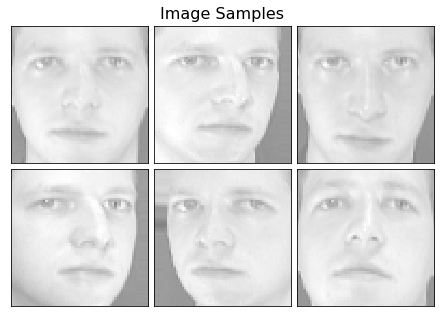

In [11]:
data, targets = fetch_olivetti_faces(return_X_y=True)
index_list = []
for i in range(3,400,10):
  index_list.append(i)

face_images = np.delete(data, index_list, axis=0)
test = data[index_list]

n_samples, n_features = face_images.shape
test_size = len(index_list)
height = 64
width = 64

print("number of samples: ",n_samples )
print("number of features: ",n_features )
plot_gallery('Image Samples',face_images[:6])

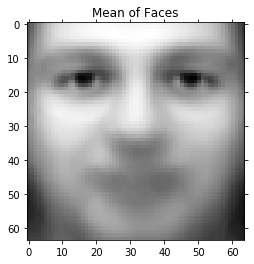

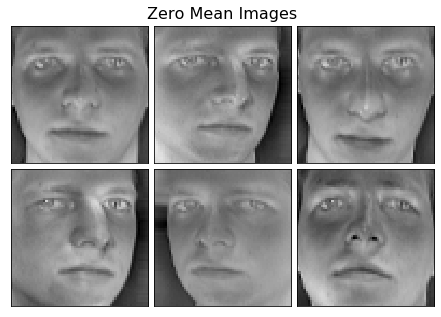

In [12]:
mean_face = face_images.mean(axis=0)

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.title('Mean of Faces')
plt.show()

zero_mean_faces = face_images - mean_face
zero_mean_faces -= zero_mean_faces.mean(axis=1).reshape(n_samples, -1)
A_T = zero_mean_faces
A = np.transpose(A_T)

plot_gallery('Zero Mean Images',zero_mean_faces[:6])

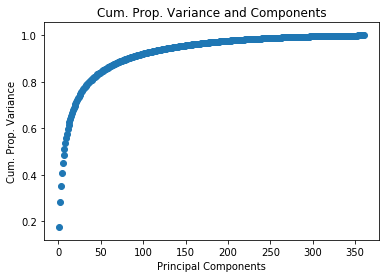

In [13]:
w, v = np.linalg.eig(np.dot(A_T,A))

eig_pairs = [(w[index], v[:,index]) for index in range(len(w))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(w))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(w))]

var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance and Components')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance')

plt.scatter(num_comp, var_comp_sum)
plt.show()

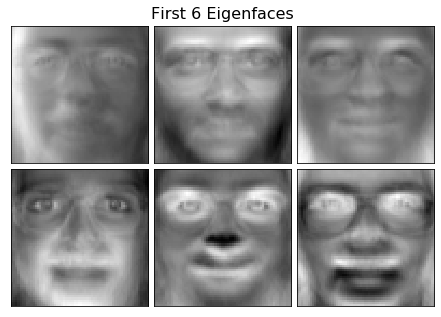

In [14]:
#We can use 150 Largest eigenvalue 
K = 150
reduced_v = np.array(eigvectors_sort[:K]).transpose()
u = np.dot(A, reduced_v)
u = u / np.linalg.norm(u)
u = np.transpose(u)

plot_gallery('First 6 Eigenfaces',u[:6])

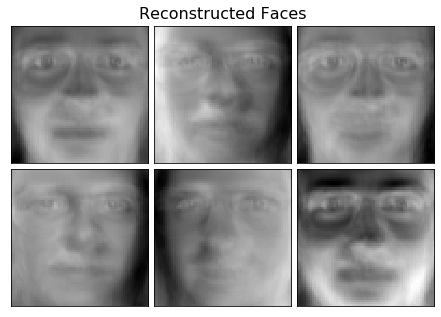

In [15]:
def reconstruct_face():
  u_k = u
  weigths = np.dot(u_k, A)
  weights = np.transpose(weigths)
  reconstructed_face = np.dot(weights, u_k)
  plot_gallery('Reconstructed Faces', reconstructed_face[:6])

  return weigths

weights = reconstruct_face()

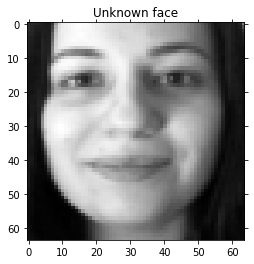

In [16]:
from skimage.color import rgb2gray
from skimage.transform import resize

unknown_face = rgb2gray(plt.imread('unknown2.png'))
unknown_face = resize(unknown_face, (64,64), anti_aliasing=True)
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

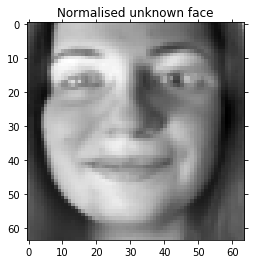

In [17]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [18]:
w_unknown = np.matrix(np.dot(u, unknown_face_vector)).transpose()
w_diff = weights.T - w_unknown.T

norms = np.linalg.norm(w_diff, axis=1)
print('Distance of the unknown image weigths',min(norms))

Distance of the unknown image weigths 2.4287849003398656


Distance of the unknown image from constructed image:  31.82672482421321


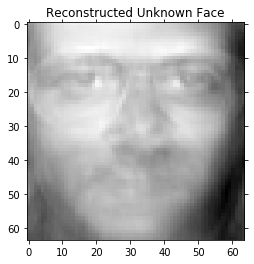

In [21]:
constructed_unknown = np.dot(np.transpose(w_unknown), u)
e = np.linalg.norm(unknown_face_vector - constructed_unknown)

print('Distance of the unknown image from constructed image: ',e)
plt.imshow(constructed_unknown.reshape((64,64)), cmap='gray')
plt.title('Reconstructed Unknown Face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

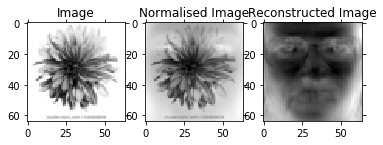

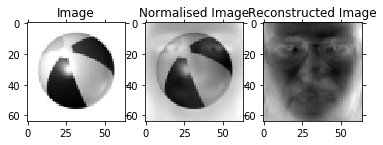

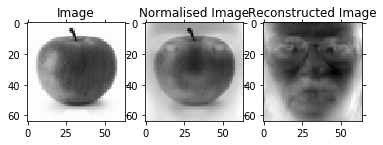

Flower Distance:  53.01675880602267
Ball Distance:  54.33673728675384
Apple Distance:  43.6615825328163


In [33]:
def calculate_Face(img):
  image = rgb2gray(plt.imread(img))
  image = resize(image, (64,64), anti_aliasing=True)
  image_vector = np.array(image, dtype='float64').flatten()

  normalised_image_vector = np.subtract(image_vector, mean_face)

  
  w_unknown = np.matrix(np.dot(u, normalised_image_vector)).transpose()
  w_diff = weights.T - w_unknown.T
  norms = np.linalg.norm(w_diff, axis=1)

  constructed_unknown = np.dot(np.transpose(w_unknown), u)
  e = np.linalg.norm(image_vector - constructed_unknown)


  plt.figure()
  plt.subplot(1,3,1)
  plt.imshow(image, cmap='gray')
  plt.title('Image')
  plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')

  plt.subplot(1,3,2)
  plt.imshow(normalised_image_vector.reshape(height, width), cmap='gray')
  plt.title('Normalised Image')
  plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')

  plt.subplot(1,3,3)
  plt.imshow(constructed_unknown.reshape((64,64)), cmap='gray')
  plt.title('Reconstructed Image')
  plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
  plt.show()
  return e 

f_dist = calculate_Face('flower.jpeg')
ball_dist = calculate_Face('download.jpeg')
apple_dist = calculate_Face('apple1_gray.jpg')
print('Flower Distance: ', f_dist)
print('Ball Distance: ', ball_dist)
print('Apple Distance: ', apple_dist)


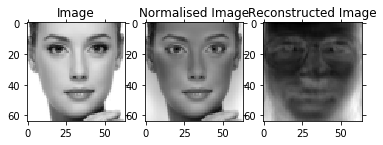

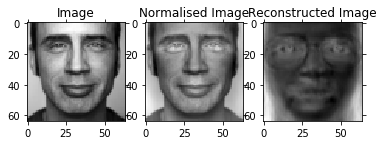

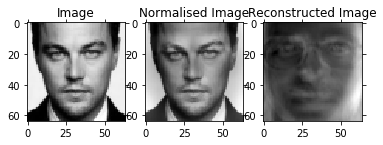

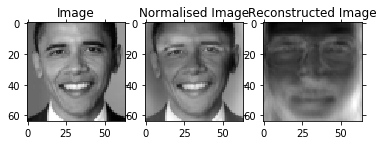

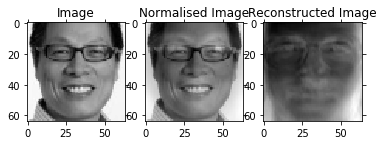

Face1 Distance:  48.04271101024956
Face2 Distance:  28.33755139767391
Face3 Distance:  40.24291274023213
Face4 Distance:  34.8429937367329
Face5 Distance:  35.936288681862024


In [34]:
face1_dist = calculate_Face('face1.png')
face2_dist = calculate_Face('face2.jpeg')
face3_dist = calculate_Face('face3.png')
face4_dist = calculate_Face('face4.png')
face5_dist = calculate_Face('face5.png')
print('Face1 Distance: ', face1_dist)
print('Face2 Distance: ', face2_dist)
print('Face3 Distance: ', face3_dist)
print('Face4 Distance: ', face4_dist)
print('Face5 Distance: ', face5_dist)

In [35]:
## Rescale the eigenfaces to detec different size of faces in images
# 32×32, 48×48, 96×96, 128×128
def changescale(scale):
  newEigFaces = np.array([resize(eigFace_img.reshape((64,64)),(scale,scale),
                            anti_aliasing=True).reshape(scale*scale) for eigFace_img in u])
  return newEigFaces

eigFaces_96 = changescale(96)
eigFaces_128 = changescale(128)
eigFaces_32 = changescale(32)
eigFaces_48 = changescale(48)

def predict_Faces():
  #Threshold 1
  T = 41
  total_true = 0
  for image_vector in test:
    normalised_image_vector = np.subtract(image_vector, mean_face)
    w_unknown = np.matrix(np.dot(u, normalised_image_vector)).transpose()
    constructed_unknown = np.dot(np.transpose(w_unknown), u)
    e = np.linalg.norm(normalised_image_vector - constructed_unknown)
    if e < T:
      total_true += 1
  
  return total_true 

print('True Possitive Accuracy for Threshold=41: %', predict_Faces()/test_size*100)

def predict_Face(img):
  T = 41
  h,w = img.shape
  image_vector = np.reshape(img, h*w)
  normalised_image_vector = np.subtract(image_vector, mean_face)
  w_unknown = np.matrix(np.dot(u, normalised_image_vector)).transpose()
  constructed_unknown = np.dot(np.transpose(w_unknown), u)
  e = np.linalg.norm(normalised_image_vector - constructed_unknown)
  
  if e < T:
    print(e)
    return True
  
  return False
  

True Possitive Accuracy for Threshold=41: % 100.0


37


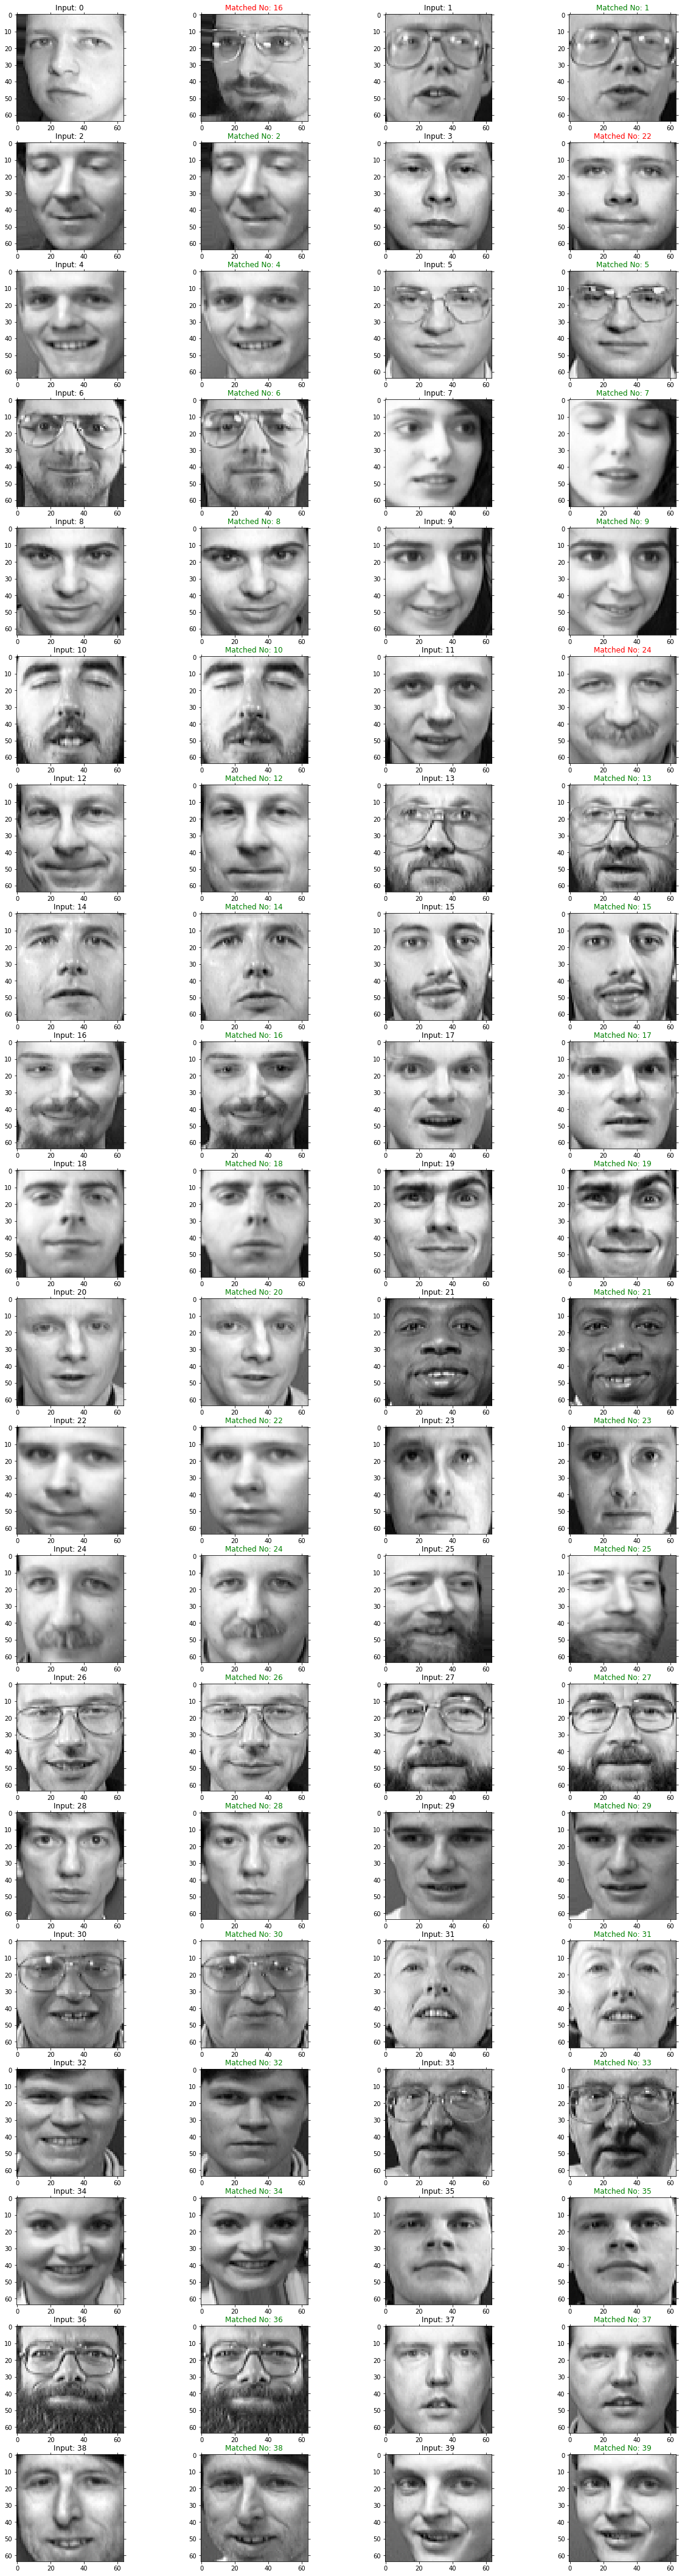

Correct predictions: 37/40 = 92.5%


In [36]:
count = 0
correct_pred = 0
num_images = 40
def recognize_face(img):
  global count, face_images, correct_pred

  unknown_face_vector = img
  normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

  plt.subplot(20,4,1+count)
  plt.imshow(np.reshape(img, (64,64)), cmap='gray')
  plt.title(('Input: '+ str(i)))
  plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
  count+=1
  

  w_unknown = np.matrix(np.dot(u, normalised_uface_vector)).transpose()
  diff  = weights.T - w_unknown.T
  norms = np.linalg.norm(diff, axis=1)
  index = np.argmin(norms)

  constructed_unknown = np.dot(np.transpose(w_unknown), u)
  d = np.linalg.norm(normalised_uface_vector - constructed_unknown)

  T1 = 41
  T2 = 1.5

  if d < T1:
    plt.subplot(20,4,1+count)
    if norms[index] < T2: # It's a face
      if index//9 == i:
        plt.title(('Matched No: '+ str(i)), color='g')
        plt.imshow(np.reshape(face_images[index], (64,64)), cmap='gray')
        correct_pred += 1
      else:
        plt.title(('Matched No: '+ str(index//9)), color='r')
        plt.imshow(np.reshape(face_images[index], (64,64)), cmap='gray')
    else:
      plt.title('Unknown face!', color='r')
    
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=4)
  else:     
    plt.subplot(20,4,1+count)
    plt.title('Not a face!', color='r')

    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
  count+=1
fig = plt.figure(figsize=(15, 15))
for i,img in enumerate(test):
  #print(i)
  recognize_face(img)
  #print('\n')
print(correct_pred)
plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))